# **Estructura de los datos**
Se incluye una descripción general de la forma y los tipos de datos. Se obtienen estadísticas descriptivas para todas las variables del conjunto. En variables categóricas se determina la frecuencia de las clases. Se identifican valores faltantes.

## Importación de los datos

In [1]:
import pandas as pd
import numpy as np


db_Bipolar = 'BPI_data.xlsx'


df = pd.read_excel(db_Bipolar)

# Hacemos una copia del dataframe
df_copia = df.copy()


In [2]:
# Mostramos las primeras filas del DataFrame para verificar que se haya cargado correctamente
df_copia.head()

,ID,Family ID,Parentesco/Proband Relation,Edad,Género/Gender,Estado Civil/Marital Status,Escolaridad/School Years,Religión,Empleo/Employment,Psychiatric_Diagnosis_DIGS,...,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders,Unnamed: 19,Unnamed: 20
0,10001,-100,3,72,2,1,6,1,1,No Pathology,...,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,NaN,1:si 2: no
1,10002,-100,2,77,1,1,4,1,1,Depresion Mayor,...,1,2,2,2,2,2,2,2,NaN,NaN
2,10003,-100,1,36,1,2,6,3,1,BPI,...,2,2,1,2,2,2,2,2,NaN,NaN
3,10101,-101,3,68,2,1,3,1,2,Depresion Mayor,...,1,2,2,2,2,2,2,2,NaN,NaN
4,10102,-101,2,56,1,1,4,1,Missing,No Pathology,...,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,NaN,NaN


## Limpieza de los datos

In [3]:
# Visualizamos el tamaño del DataFrame
print("Número de filas y columnas:")
print(df_copia.shape)

Número de filas y columnas:
(427, 21)


In [4]:
# Hacemos un info para entender mejor el df y ver los tipos de datos para cada variable
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             427 non-null    int64  
 1   Family ID                      427 non-null    int64  
 2   Parentesco/Proband Relation    427 non-null    object 
 3   Edad                           427 non-null    object 
 4   Género/Gender                  427 non-null    int64  
 5   Estado Civil/Marital Status    427 non-null    object 
 6   Escolaridad/School Years       427 non-null    object 
 7   Religión                       427 non-null    object 
 8   Empleo/Employment              423 non-null    object 
 9   Psychiatric_Diagnosis_DIGS     425 non-null    object 
 10  Psychosis_DIGS                 427 non-null    object 
 11  D+AH1epression_DIGS            427 non-null    object 
 12  Anxiety_DIGS                   427 non-null    obj

In [5]:
# Contamos y visualizamos todas las columnas que tiene el df
for i, columna in enumerate(df_copia.columns, start=1):
    print("Columna", i, columna)

Columna 1 ID
Columna 2 Family ID
Columna 3 Parentesco/Proband Relation
Columna 4 Edad
Columna 5 Género/Gender
Columna 6 Estado Civil/Marital Status
Columna 7 Escolaridad/School Years
Columna 8 Religión
Columna 9 Empleo/Employment
Columna 10 Psychiatric_Diagnosis_DIGS
Columna 11 Psychosis_DIGS
Columna 12 D+AH1epression_DIGS
Columna 13 Anxiety_DIGS
Columna 14 Bipolar_DIGS
Columna 15 Eating_Disorders_DIGS
Columna 16 Alcohol_Abuse/Dependence_DIGS
Columna 17 Drugs_Abuse/Dependence_DIGS
Columna 18 Behaviour_Disorders
Columna 19 Personality_Disorders
Columna 20 Unnamed: 19
Columna 21 Unnamed: 20


In [6]:
# Eliminamos las columnas que no vamos a necesitar
columnas_a_eliminar = ["ID", "Unnamed: 19", "Unnamed: 20"]
df_copia.drop(columnas_a_eliminar, axis=1, inplace=True)

In [7]:
# Formateamos los nombres de las columnas
nuevos_nombres = {
    "Family ID": "Family_ID",
    "Parentesco/Proband Relation": "Proband_Relation",
    "Género/Gender": "Gender",
    "Estado Civil/Marital Status": "Marital_Status",
    "Escolaridad/School Years": "School_Years",
    "Empleo/Employment": "Employment",
    "Edad":"Age",
    "Religión": "Religion",

}

df_copia.rename(columns=nuevos_nombres, inplace=True)

In [8]:
# Vemos todas las columnas que tiene el df despues de eliminar las no necesarias y formatear las existentes
for i, columna in enumerate(df_copia.columns, start=1):
    print("Columna", i, columna)

Columna 1 Family_ID
Columna 2 Proband_Relation
Columna 3 Age
Columna 4 Gender
Columna 5 Marital_Status
Columna 6 School_Years
Columna 7 Religion
Columna 8 Employment
Columna 9 Psychiatric_Diagnosis_DIGS
Columna 10 Psychosis_DIGS
Columna 11 D+AH1epression_DIGS
Columna 12 Anxiety_DIGS
Columna 13 Bipolar_DIGS
Columna 14 Eating_Disorders_DIGS
Columna 15 Alcohol_Abuse/Dependence_DIGS
Columna 16 Drugs_Abuse/Dependence_DIGS
Columna 17 Behaviour_Disorders
Columna 18 Personality_Disorders


In [9]:
# Hacemos un conteo de los datos que sean nulos por columna
print(df_copia.isnull().sum())

Family_ID                        0
Proband_Relation                 0
Age                              0
Gender                           0
Marital_Status                   0
School_Years                     0
Religion                         0
Employment                       4
Psychiatric_Diagnosis_DIGS       2
Psychosis_DIGS                   0
D+AH1epression_DIGS              0
Anxiety_DIGS                     0
Bipolar_DIGS                     0
Eating_Disorders_DIGS            0
Alcohol_Abuse/Dependence_DIGS    0
Drugs_Abuse/Dependence_DIGS      0
Behaviour_Disorders              0
Personality_Disorders            0
dtype: int64


In [10]:
# Eliminamos los datos que sean nulos para cada columna
df_copia.dropna(inplace=True)

In [11]:
# Hacemos un conteo de los datos que sean nulos nuevamente
print(df_copia.isnull().sum())

Family_ID                        0
Proband_Relation                 0
Age                              0
Gender                           0
Marital_Status                   0
School_Years                     0
Religion                         0
Employment                       0
Psychiatric_Diagnosis_DIGS       0
Psychosis_DIGS                   0
D+AH1epression_DIGS              0
Anxiety_DIGS                     0
Bipolar_DIGS                     0
Eating_Disorders_DIGS            0
Alcohol_Abuse/Dependence_DIGS    0
Drugs_Abuse/Dependence_DIGS      0
Behaviour_Disorders              0
Personality_Disorders            0
dtype: int64


In [12]:
# Creamos una función para convertir los strings de cada columna a numericos y remplazarlos por la moda
# Dado que son variables categoricas

def procesar_columna(df_proce, columna):

    df_proce[columna] = pd.to_numeric(df_proce[columna], errors='coerce')

    moda_columna = df_proce[columna].mode()[0]

    df_proce[columna] = df_proce[columna].fillna(moda_columna)

    df_proce[columna] = df_proce[columna].astype(int)

    return df_proce[columna]

In [13]:
# Con base en el info que se hizo anteriormente convertimos solo las columnas que deberían de ser tipo entero
# pero al tener algún string en las filas, lo detecta como object

# Lista de nombres de las columnas categoricas que se van a sustituir los valores string por numericos
col_cat = ['Proband_Relation', 'Age', 'Marital_Status', 'School_Years', 'Employment']

# Aplicamos la función procesar_columna a cada columna
for columna in col_cat:
    df_copia[columna] = procesar_columna(df_copia, columna)

# Definir los valores a reemplazar en la columna Religion
reemplazos = {"ND": 3, "ateo": 3, "atea": 3, "no": 3,
              "Missing": df_copia['Religion'].mode()[0]
              }

# Sustituir los valores en la columna "Religion"
df_copia['Religion'].replace(reemplazos, inplace=True)

In [14]:
# Creamos una funcion para sustituir las variables categoricas que esten fuera de rango por la moda

def procesar_columna_range(df_pro, columna, rango_min, rango_max):
    # Encuentra la moda de la columna
    moda_columna = df_pro[columna].mode()[0]

    # Reemplaza los valores que no están en el rango por la moda
    df_pro[columna] = df_pro[columna].apply(lambda x: x if rango_min <= x <= rango_max else moda_columna)

    return df_pro[columna]

In [15]:
# Formateamos las columnas para que no esten fuera de rango

 # Definir los rangos permitidos para cada columna
rangos = {
    'Proband_Relation': (1,15),
    'Gender': (1,2),
    'Marital_Status': (1,6),
    'School_Years': (1,6),
    'Employment': (1,2),
}

# Aplicamos la función procesar_columna_range a cada columna con su respectivo rango
for columna, (rango_min, rango_max) in rangos.items():
    df_copia[columna] = procesar_columna_range(df_copia, columna, rango_min, rango_max)

In [16]:
# Hacemos un head para visualizar la tabla
# Como se observa hay variables donde las categorias estan como números, hay que mapearlas
df_copia.head()

,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,-100,3,72,2,1,6,1,1,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,-100,2,77,1,1,4,1,1,Depresion Mayor,2,1,2,2,2,2,2,2,2
2,-100,1,36,1,2,6,3,1,BPI,2,2,2,1,2,2,2,2,2
3,-101,3,68,2,1,3,1,2,Depresion Mayor,2,1,2,2,2,2,2,2,2
4,-101,2,56,1,1,4,1,1,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


In [17]:
# Mapeamos las columnas del df con sus respectivas categorias
mapeo = {
    'Proband_Relation': {1: 'Proband', 2: 'Father', 3: 'Mother', 4: 'Brother', 5: 'Sister', 6: 'Son', 7: 'Daughter', 8:'Uncle', 9:'Aunt',
                   10:'Grandfather',11:'Grandmother', 12:'Nephew',13:'Niece',14:'Cousin_Male',15:"Cousin_Female" },
    'Gender': {1: 'Male', 2: 'Female'},
    'Marital_Status': {1: 'Married', 2: 'Single', 3:'Divorced',4:'Widowed',5:'Living_together',6:'Separated'},
    'School_Years': {1:'Elementary_school',2:'Middle_school',3:'High_school',4:'College',5:'Postgraduate',6:'Technical_studies'},
    'Employment': {1:'Yes',2:'No'},
    'Psychosis_DIGS': {1:'Yes', 2:'No Pathology'},
    'D+AH1epression_DIGS': {1:'Yes', 2:'No Pathology'},
    'Anxiety_DIGS': {1:'Yes', 2:'No Pathology'},
    'Bipolar_DIGS': {1:'Yes', 2:'No Pathology'},
    'Eating_Disorders_DIGS': {1:'Yes', 2:'No Pathology'},
    'Alcohol_Abuse/Dependence_DIGS': {1:'Yes', 2:'No Pathology'},
    'Drugs_Abuse/Dependence_DIGS': {1:'Yes', 2:'No Pathology'},
    'Behaviour_Disorders': {1:'Yes', 2:'No Pathology'},
    'Personality_Disorders': {1:'Yes', 2:'No Pathology'},
}

df_copia.replace(mapeo, inplace=True)


In [18]:
# Hacemos un info para ver el df despues de la limpieza y el mapeo
# Ahora solo debemos tener dos variables tipo numericas Family ID y Age todas las demas deben de ser categoricas
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 426
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Family_ID                      421 non-null    int64 
 1   Proband_Relation               421 non-null    object
 2   Age                            421 non-null    int64 
 3   Gender                         421 non-null    object
 4   Marital_Status                 421 non-null    object
 5   School_Years                   421 non-null    object
 6   Religion                       421 non-null    int64 
 7   Employment                     421 non-null    object
 8   Psychiatric_Diagnosis_DIGS     421 non-null    object
 9   Psychosis_DIGS                 421 non-null    object
 10  D+AH1epression_DIGS            421 non-null    object
 11  Anxiety_DIGS                   421 non-null    object
 12  Bipolar_DIGS                   421 non-null    object
 13  Eating_Dis

In [19]:
# Hacemos un head despues del mapeo para visualizar los cambios
df_copia.head()


,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,-100,Mother,72,Female,Married,Technical_studies,1,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,-100,Father,77,Male,Married,College,1,Yes,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
2,-100,Proband,36,Male,Single,Technical_studies,3,Yes,BPI,No Pathology,No Pathology,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
3,-101,Mother,68,Female,Married,High_school,1,No,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
4,-101,Father,56,Male,Married,College,1,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


## Estadistica de los datos

In [20]:
# Descripcion general de los datos
print("Descripción general de la forma y los tipos de datos:")
print(df_copia.info())

Descripción general de la forma y los tipos de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 426
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Family_ID                      421 non-null    int64 
 1   Proband_Relation               421 non-null    object
 2   Age                            421 non-null    int64 
 3   Gender                         421 non-null    object
 4   Marital_Status                 421 non-null    object
 5   School_Years                   421 non-null    object
 6   Religion                       421 non-null    int64 
 7   Employment                     421 non-null    object
 8   Psychiatric_Diagnosis_DIGS     421 non-null    object
 9   Psychosis_DIGS                 421 non-null    object
 10  D+AH1epression_DIGS            421 non-null    object
 11  Anxiety_DIGS                   421 non-null    object
 12  Bipolar_DIGS   

In [21]:
# Convertimos todos los valores de la columna "Family ID" a su valor absoluto
df_copia['Family_ID'] = df_copia['Family_ID'].abs()


In [22]:
# Aplicamos estadistica descriptiva solo a las variables numéricas
df_copia.describe(include=[np.number])


,Family_ID,Age,Religion
count,421.000000,421.000000,421.000000
mean,144.705463,40.795724,1.237530
std,26.502268,15.603451,0.577859
min,100.000000,15.000000,1.000000
25%,122.000000,28.000000,1.000000
50%,143.000000,39.000000,1.000000
75%,172.000000,52.000000,1.000000
max,187.000000,87.000000,4.000000


### Frecuencia de las clases en variables categóricas

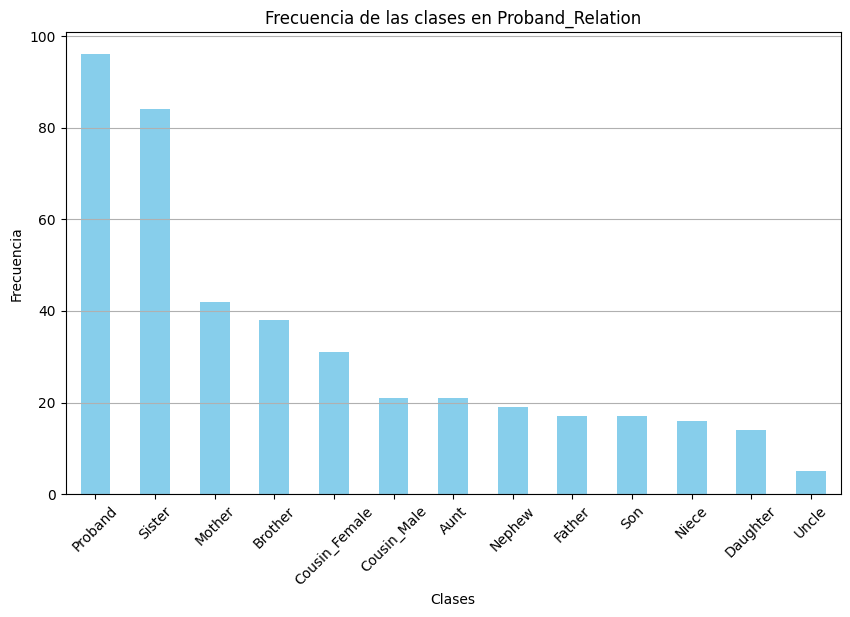

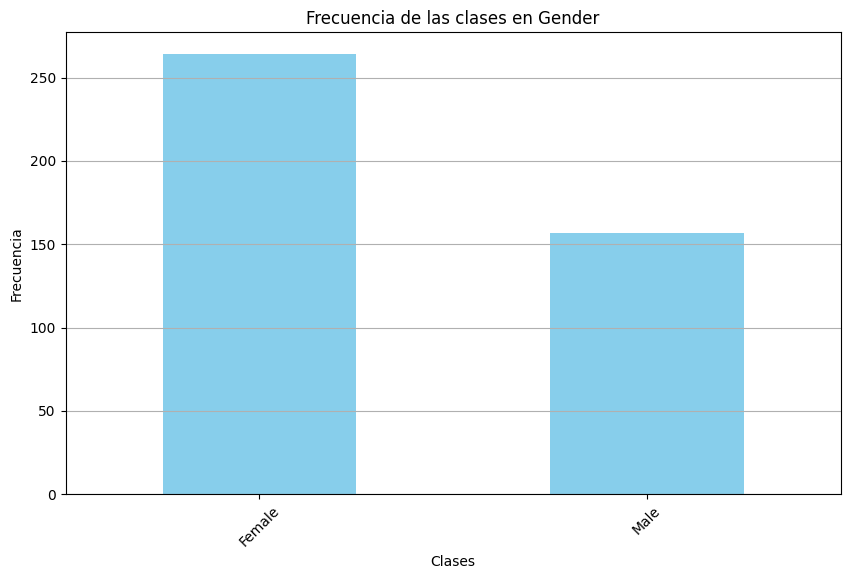

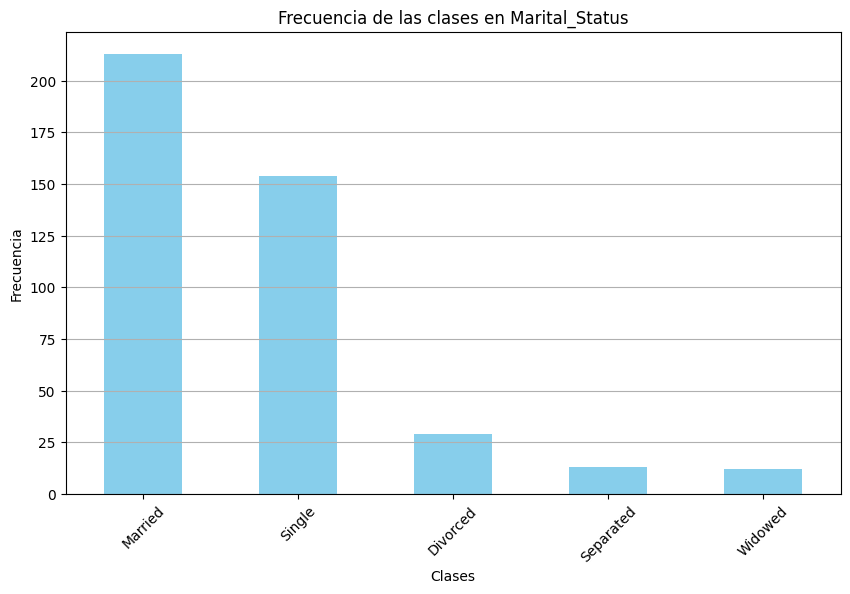

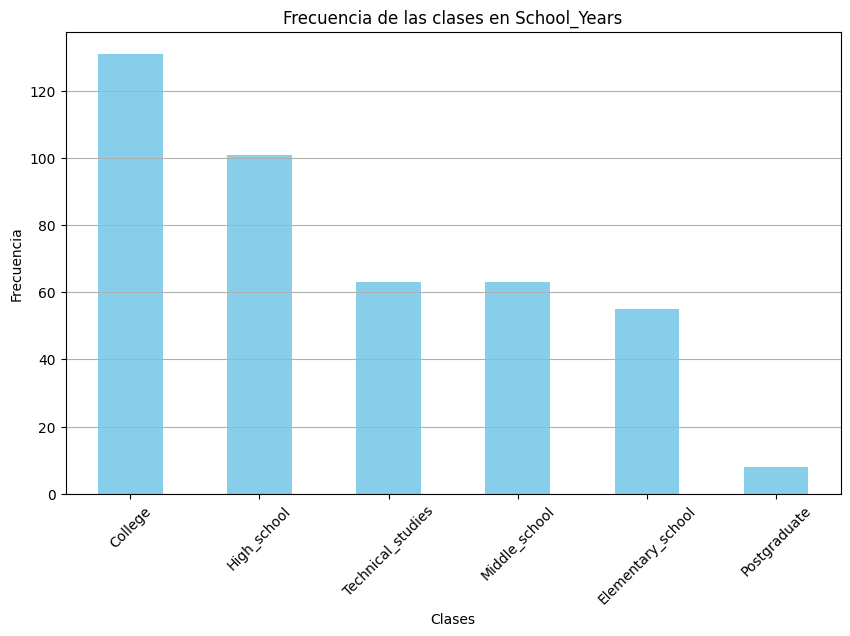

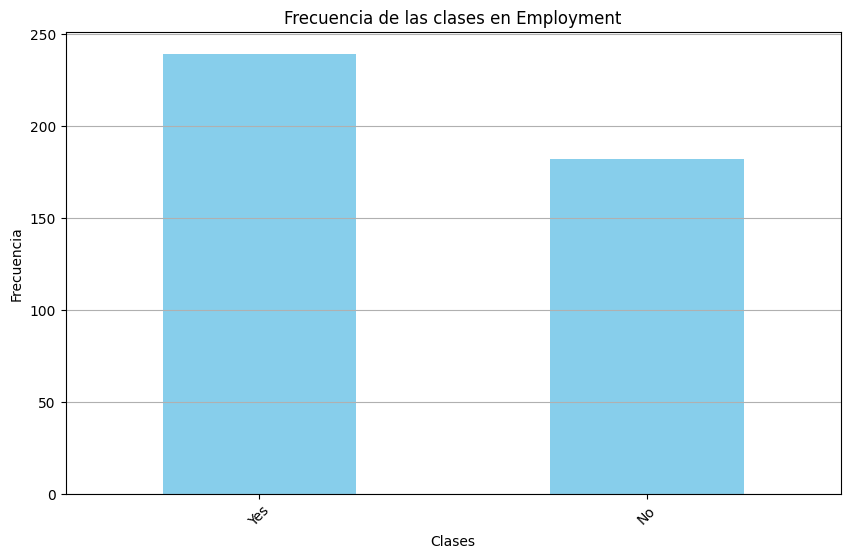

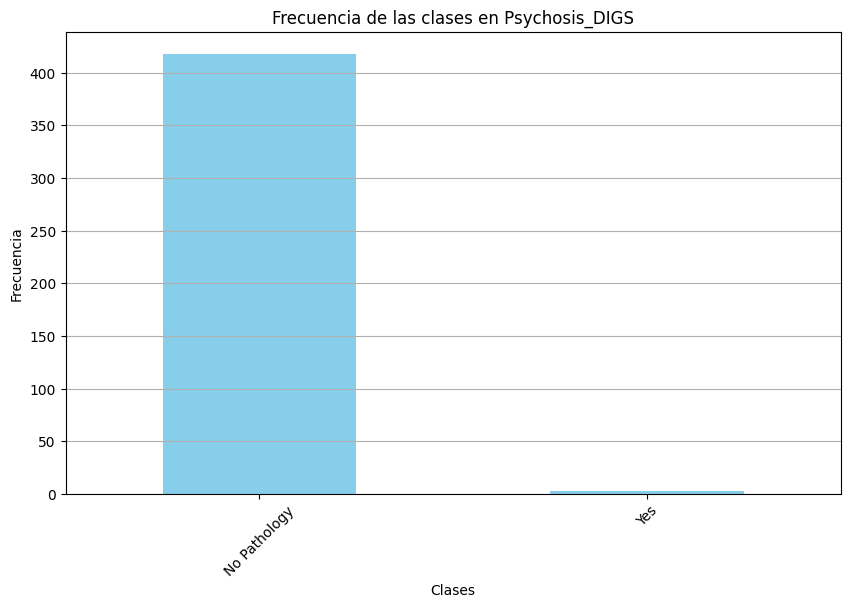

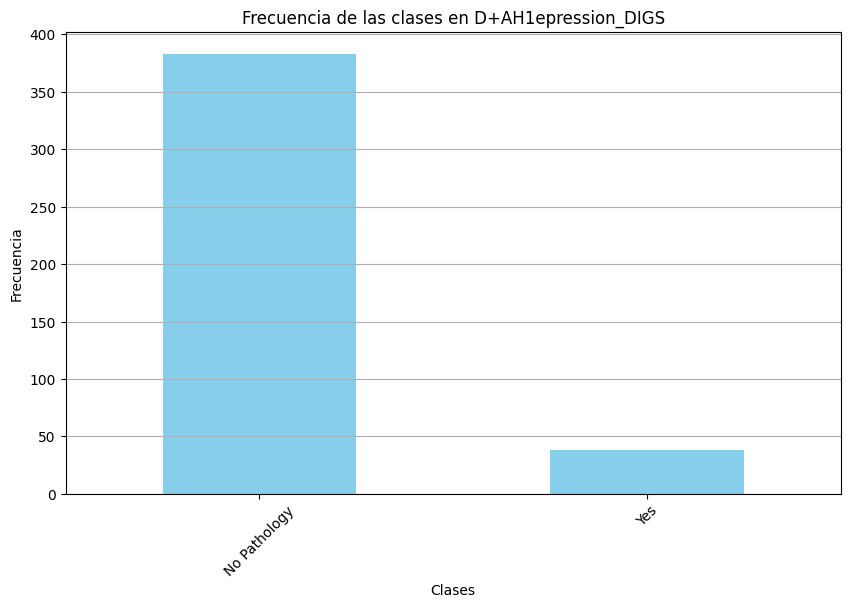

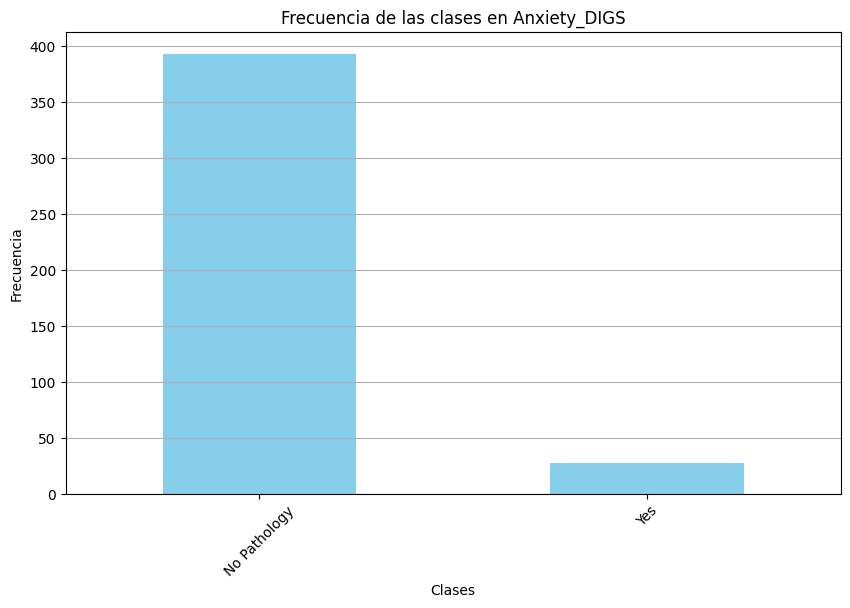

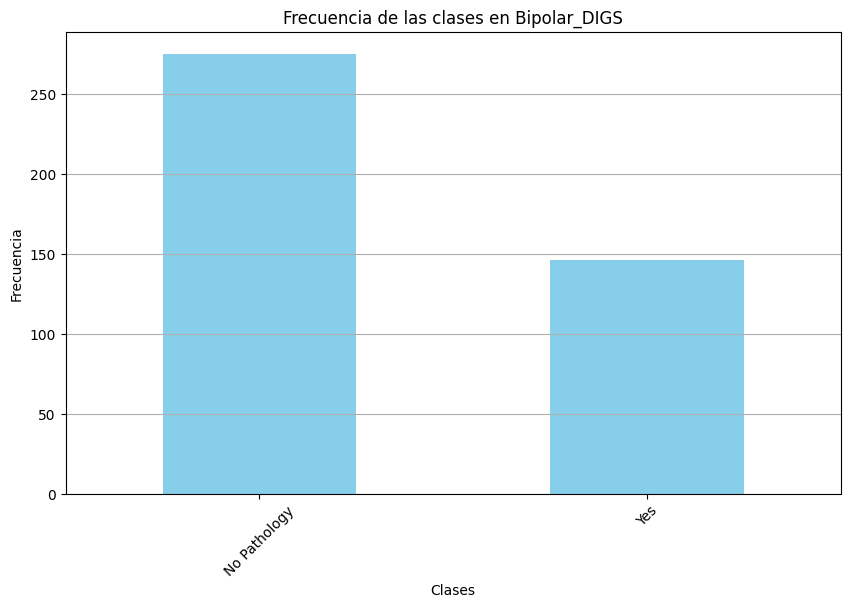

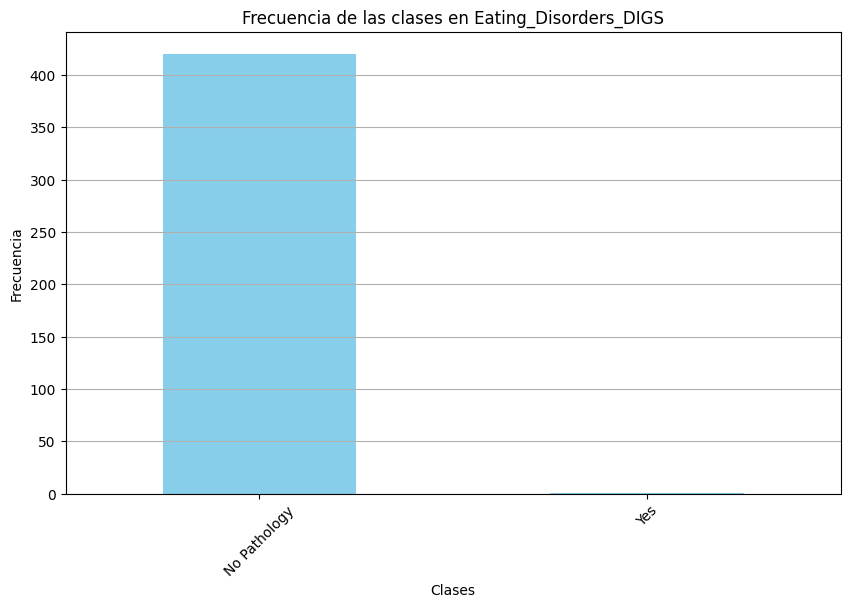

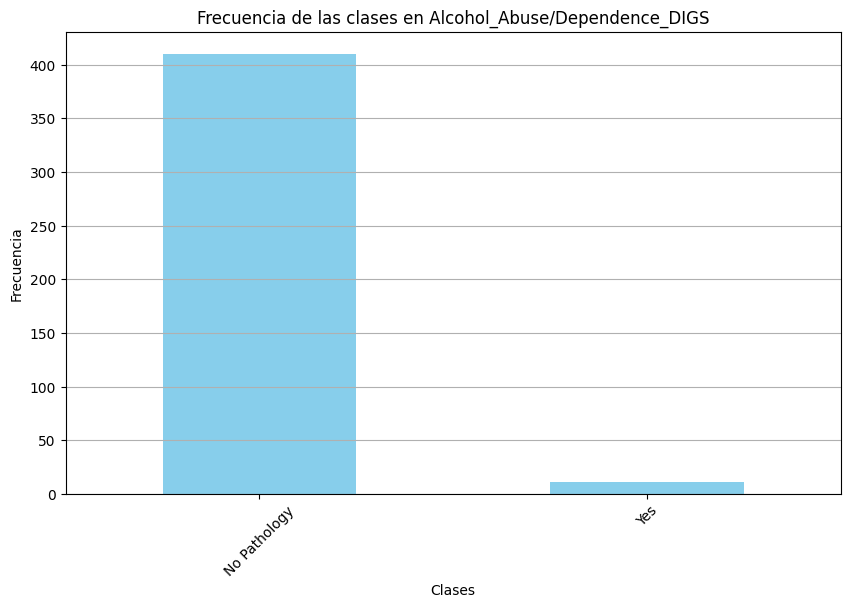

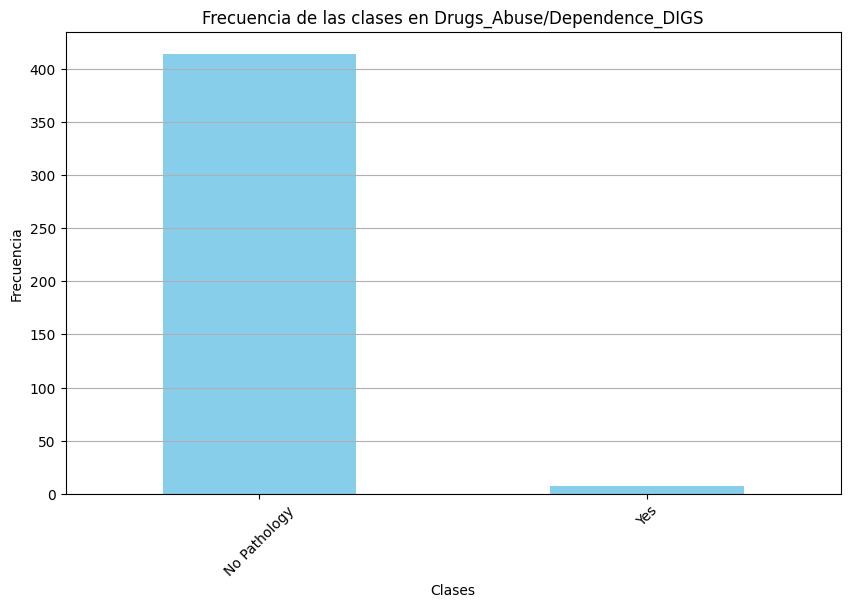

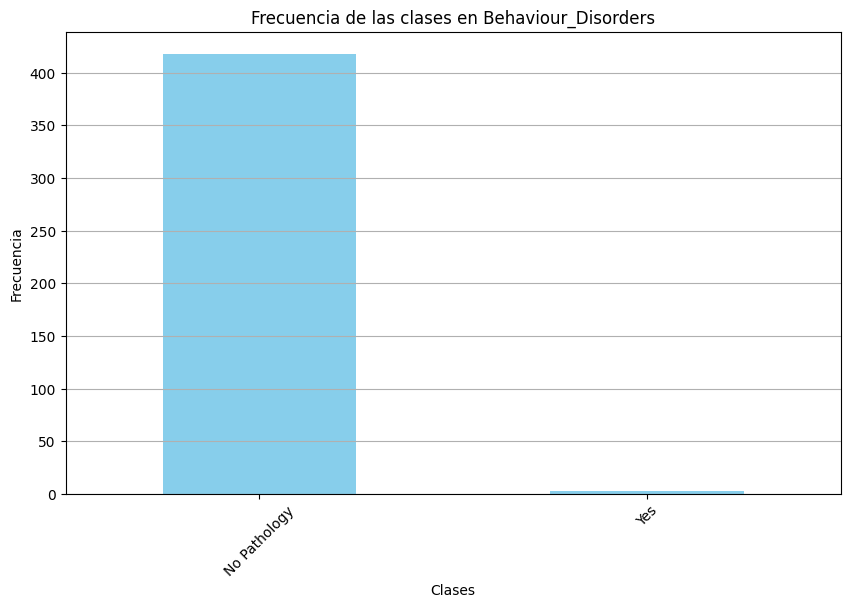

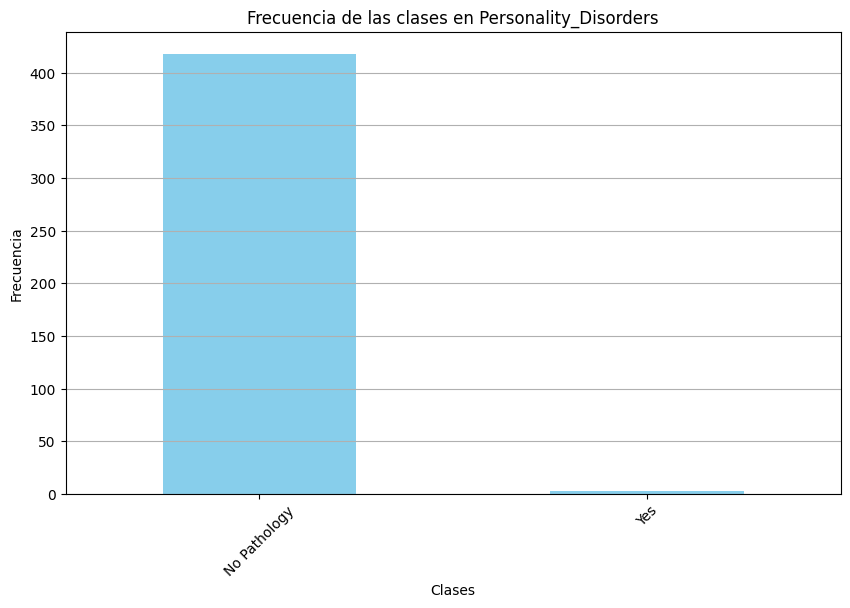

In [23]:
# Calculamos la frecuencia de cada una de las clases exepto la clase de salida
import matplotlib.pyplot as plt

# Obtener todas las columnas categóricas excepto 'Psychiatric_Diagnosis_DIGS'
columnas_categoricas = df_copia.select_dtypes(include='object').columns
columnas_graficas = [columna for columna in columnas_categoricas if columna != 'Psychiatric_Diagnosis_DIGS']

# Creamos subgráficos solo para las columnas seleccionadas
for columna in columnas_graficas:
    # Calculamos la frecuencia de las clases
    frecuencia_clases = df_copia[columna].value_counts()

    # Creamos el gráfico de barras
    plt.figure(figsize=(10, 6))
    frecuencia_clases.plot(kind='bar', color='skyblue')
    plt.title(f"Frecuencia de las clases en {columna}")
    plt.xlabel("Clases")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Mostramos el gráfico
    plt.show()


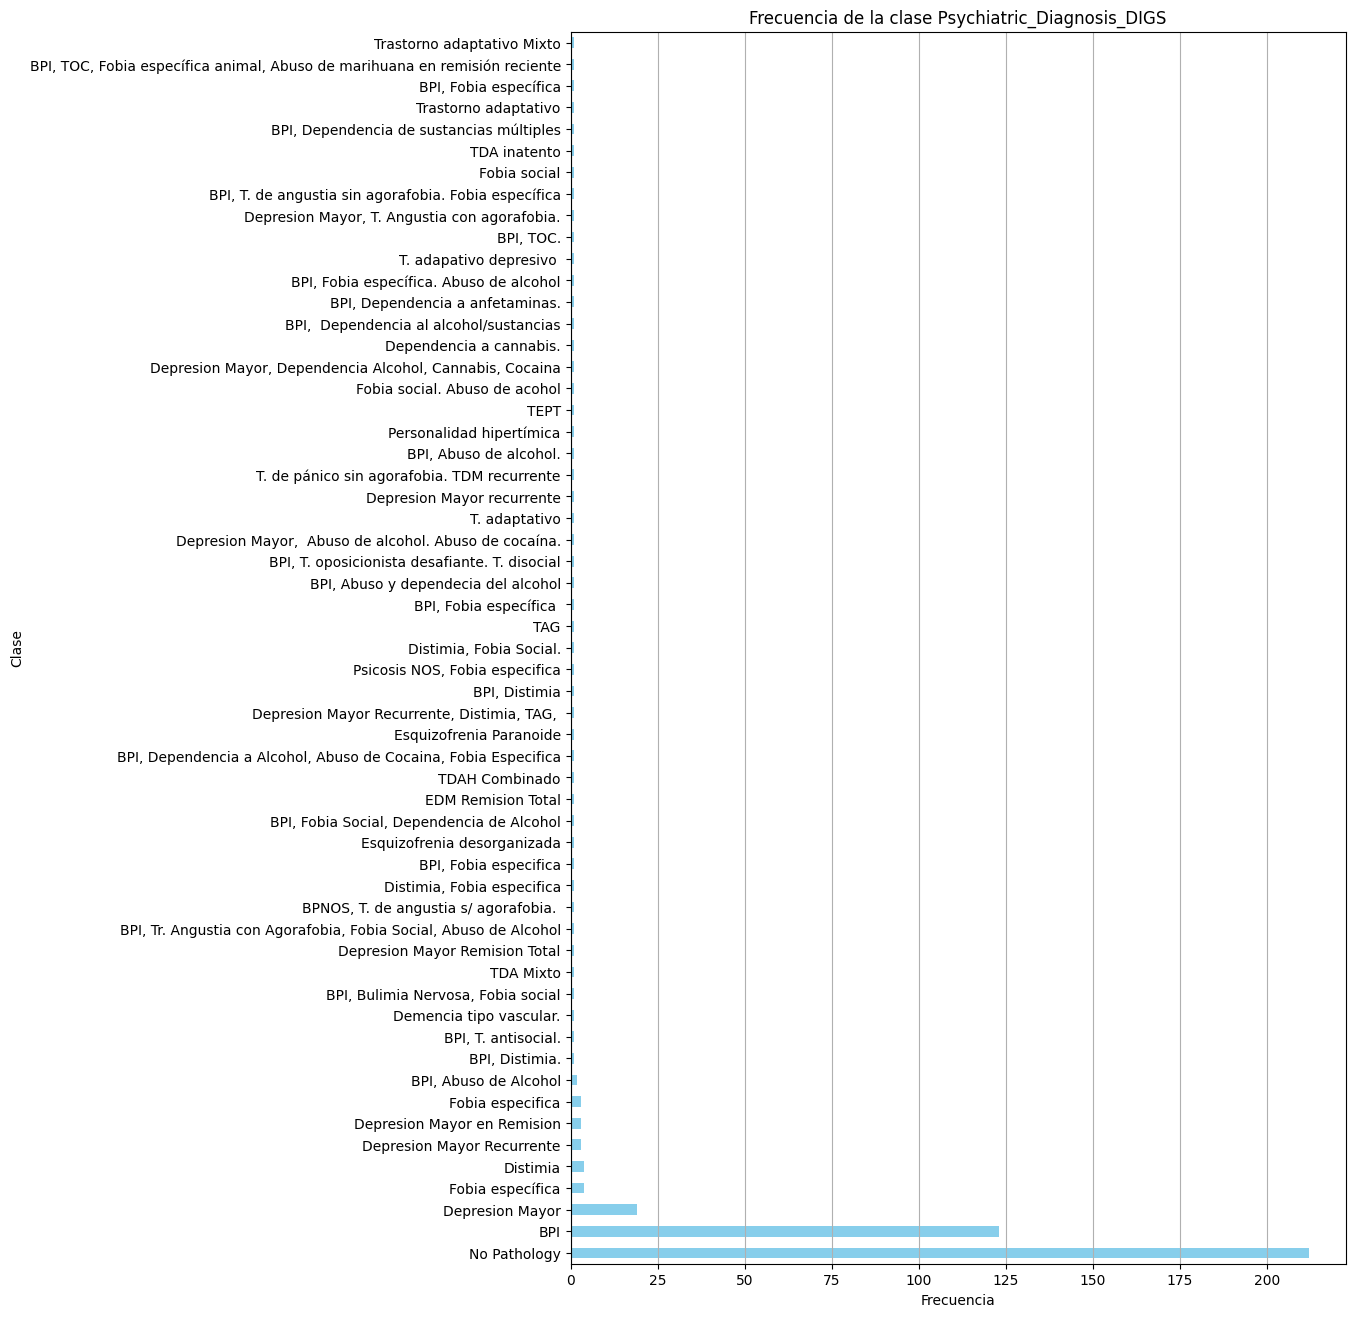

In [24]:
# Calculamos la frecuencia de la clase 'Psychiatric_Diagnosis_DIGS'
frecuencia_clase = df_copia['Psychiatric_Diagnosis_DIGS'].value_counts()

# Creamos el gráfico de barras horizontal
plt.figure(figsize=(10, 16))
frecuencia_clase.plot(kind='barh', color='skyblue')
plt.title("Frecuencia de la clase Psychiatric_Diagnosis_DIGS")
plt.xlabel("Frecuencia")
plt.ylabel("Clase")
plt.grid(axis='x')

# Mostramos el gráfico
plt.show()


In [25]:
# Hacemos un shape para ver como quedó el dataset
df_copia.shape

(421, 18)



---



# Análisis univariante
Se emplean técnicas de visualización (histogramas, boxplot, gráficos de barras) en función del tipo de datos y la escala de medición.

# Análisis bi/multivariante

Se efectúan análisis de correlación (cuantitativos y gráficos) para explorar las relaciones entre las variables importantes del conjunto de datos.


Debido a que nuestras features consisten principalmente en variables categoricas con etiquestas podemos usar tecnicas de analisis de asociacion diseñadas para este tipo de variables.

Tales como el coeficiente de correlacion de Spearman y Kendall

Asi mismo podemos reducir la dimensionalidad de nuestras features mediante el uso de tecnicas como el Analisis de Componentes Principales (PCA) para obtener las combinaciones lineales que capturen la mayor parte de la variabilidad de los datos

In [26]:
# Hacemos una copia de los datos sin valores faltantes o nulos
multi_df = df_copia.copy()
multi_df["Family_ID"] = multi_df["Family_ID"].abs()
multi_df.head()

,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,100,Mother,72,Female,Married,Technical_studies,1,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,100,Father,77,Male,Married,College,1,Yes,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
2,100,Proband,36,Male,Single,Technical_studies,3,Yes,BPI,No Pathology,No Pathology,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
3,101,Mother,68,Female,Married,High_school,1,No,Depresion Mayor,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
4,101,Father,56,Male,Married,College,1,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


In [27]:
import seaborn as sns

def plot_heatmap(corr_matrix, method):
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, cmap='coolwarm_r', fmt=".2f")
  plt.title(f'Heatmap de la Matriz de Correlación usando metodo {method}')
  plt.show()

Para trabajar con los metodos mencionados es necesario convertir nuestras variables categoricas en representaciones numericas antes de calcular las correlaciones.

Usaremos 2 tecnicas comunes para analizar nuestros datos y determinar cual es el metodo mas adecuado para nuestro caso de estudio:



1.   One Hot Encoding
2.   Label Encoding





## One Hot Encoding

 Creamos una columna con valores binarios (0 o 1) para cada categoría. Esto es útil cuando no hay un orden implícito en las categorías.

In [28]:
# Crear one-hot encoding para las variables categóricas
one_hot_df = pd.get_dummies(multi_df)
one_hot_df.head()

,Family_ID,Age,Religion,Proband_Relation_Aunt,Proband_Relation_Brother,Proband_Relation_Cousin_Female,Proband_Relation_Cousin_Male,Proband_Relation_Daughter,Proband_Relation_Father,Proband_Relation_Mother,...,Eating_Disorders_DIGS_No Pathology,Eating_Disorders_DIGS_Yes,Alcohol_Abuse/Dependence_DIGS_No Pathology,Alcohol_Abuse/Dependence_DIGS_Yes,Drugs_Abuse/Dependence_DIGS_No Pathology,Drugs_Abuse/Dependence_DIGS_Yes,Behaviour_Disorders_No Pathology,Behaviour_Disorders_Yes,Personality_Disorders_No Pathology,Personality_Disorders_Yes
0,100,72,1,False,False,False,False,False,False,True,...,True,False,True,False,True,False,True,False,True,False
1,100,77,1,False,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False
2,100,36,3,False,False,False,False,False,False,False,...,True,False,True,False,True,False,True,False,True,False
3,101,68,1,False,False,False,False,False,False,True,...,True,False,True,False,True,False,True,False,True,False
4,101,56,1,False,False,False,False,False,True,False,...,True,False,True,False,True,False,True,False,True,False


## Label Encoder

Asignamos a cada categoria/valor un numero unico. Esto es util si hay un orden implicito en las categorias.

In [29]:
from sklearn.preprocessing import LabelEncoder

label_df = multi_df.copy()
# Creamos una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Definimos las columnas categoricas
columnas_categoricas = ["Proband_Relation", "Gender", "Marital_Status", "School_Years", "Employment", "Psychiatric_Diagnosis_DIGS", "Psychosis_DIGS", "D+AH1epression_DIGS",
                        "Anxiety_DIGS", "Bipolar_DIGS", "Eating_Disorders_DIGS", "Alcohol_Abuse/Dependence_DIGS", "Drugs_Abuse/Dependence_DIGS", "Behaviour_Disorders", "Personality_Disorders"]
# Aplicar la codificación de etiquetas a cada columna
for columna in columnas_categoricas:
    label_df[columna] = label_encoder.fit_transform(label_df[columna])

label_df.head()

,Family_ID,Proband_Relation,Age,Gender,Marital_Status,School_Years,Religion,Employment,Psychiatric_Diagnosis_DIGS,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,100,6,72,0,1,5,1,1,44,0,0,0,0,0,0,0,0,0
1,100,5,77,1,1,0,1,1,25,0,1,0,0,0,0,0,0,0
2,100,9,36,1,3,5,3,1,0,0,0,0,1,0,0,0,0,0
3,101,6,68,0,1,2,1,0,25,0,1,0,0,0,0,0,0,0
4,101,5,56,1,1,0,1,1,44,0,0,0,0,0,0,0,0,0


## Matriz de Correlacion y Analisis PCA



In [34]:
import pandas as pd
from scipy.stats import spearmanr

def get_correlation_matrix(df_encoded, method):
  # Calcular el coeficiente de correlación de Spearman para cada par de columnas
  spearman_corr_matrix = df_encoded.corr(method=method)

  # Visualizar la matriz de correlación
  plot_heatmap(spearman_corr_matrix, method=method)

In [93]:
from sklearn.decomposition import PCA

def get_PCA(df_encoded):
  # Crear una instancia de PCA
  pca = PCA()

  # Ajustar el modelo PCA a nuestros datos
  pca.fit(df_encoded)

  # Visualizamos el número de componentes necesarios para explicar
  # cierta cantidad de varianza
  total_varianza_explicada = pca.explained_variance_ratio_.cumsum()
  varianza_noventa = sum(total_varianza_explicada < 0.90) + 1
  print("Número de componentes para explicar el 90% de la varianza:",
        varianza_noventa)

  pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                          'Proportion of variance': pca.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
                          })
  pcsSummary = pcsSummary.transpose()
  pcsSummary = pcsSummary.round(4)

  PC_components = np.arange(varianza_noventa) + 1

  _ = sns.set(style = 'whitegrid',
              font_scale = 1.2
              )

  fig, ax = plt.subplots(figsize=(10, 7))

  _ = sns.barplot(x = PC_components,
                  y = pca.explained_variance_ratio_[:varianza_noventa],
                  color = 'b'
                  )

  _ = sns.lineplot(x = PC_components-1,
                   y = np.cumsum(pca.explained_variance_ratio_[:varianza_noventa]),
                   color = 'black',
                   linestyle = '-',
                   linewidth = 2,
                   marker = 'o',
                   markersize = 8
                   )

  plt.title('Scree Plot > 90% Varianza')
  plt.xlabel('N-th Componente Principal')
  plt.ylabel('Varianza Explicada')
  plt.ylim(0, 1)
  plt.show()

  pca_Components_df = pd.DataFrame(pca.components_.transpose(),
                                columns=pcsSummary.columns,
                                index=df_encoded.columns
                                )
  pca_Components_df.columns = \
   ['PC' + str(i) for i in range(1, pca_Components_df.shape[1] + 1)]
  pca_Components_df = pca_Components_df.sort_values(by='PC1', ascending=False)
  return pca_Components_df.iloc[:, :varianza_noventa + 1]

### Usando One Hot Encoding

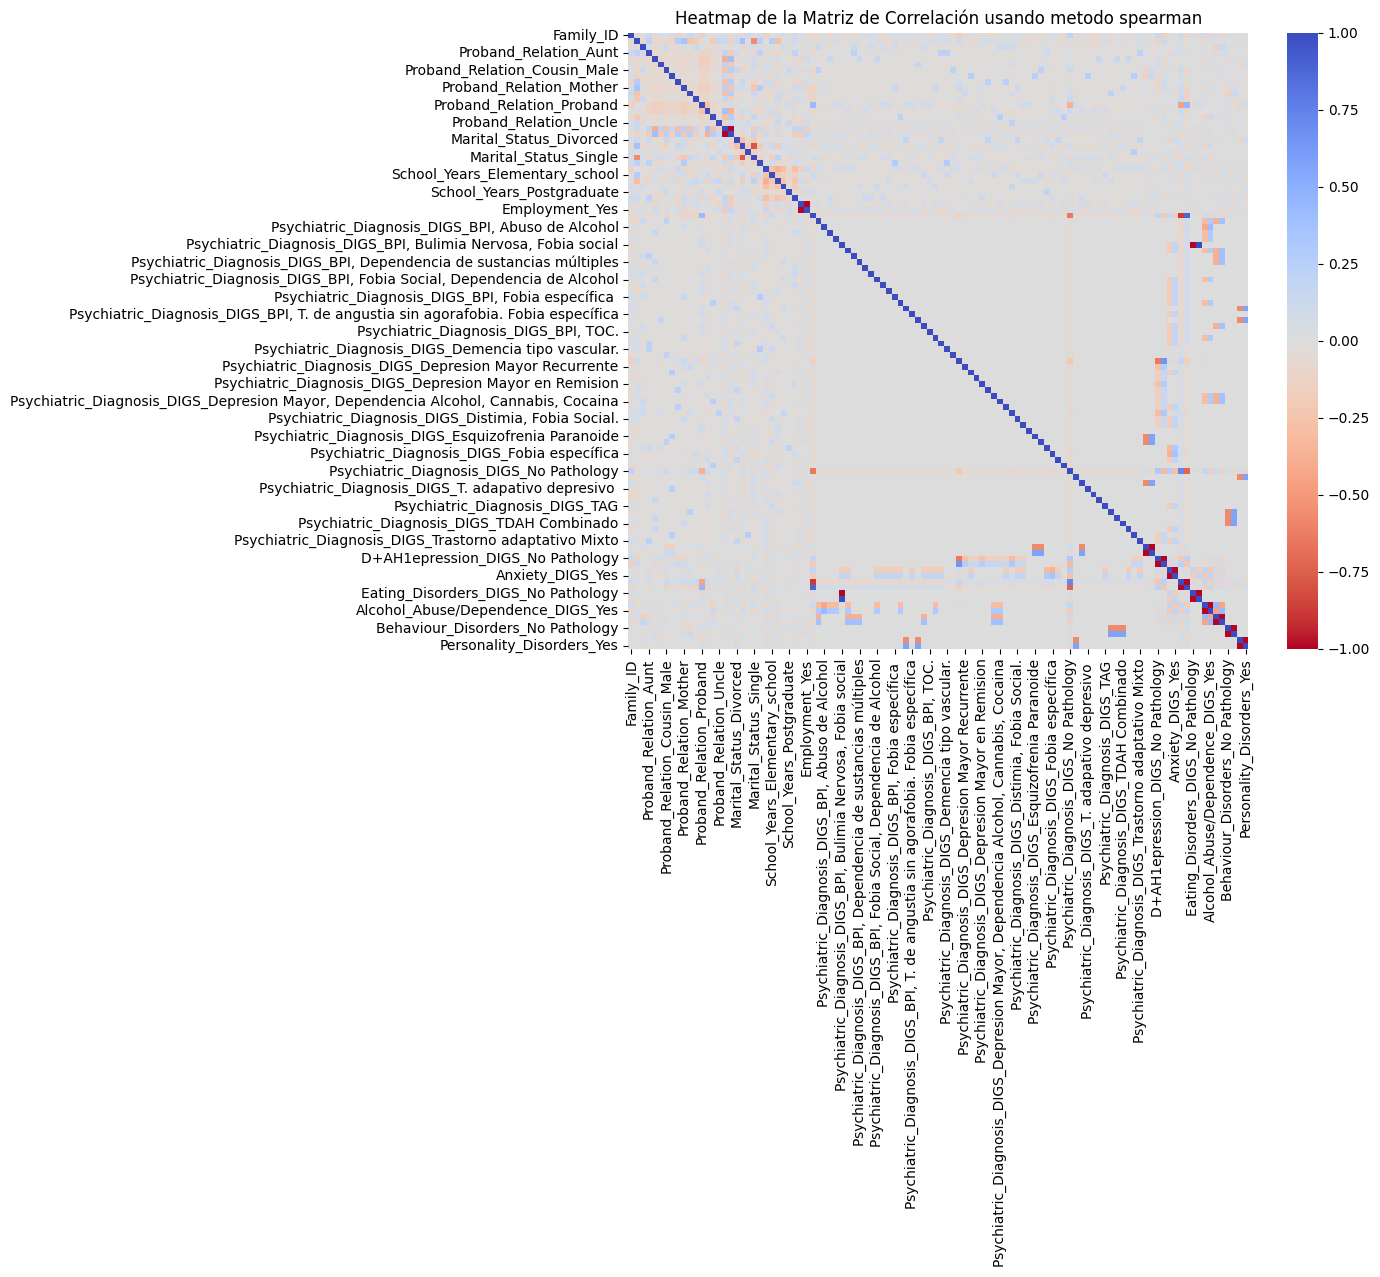

In [36]:
get_correlation_matrix(one_hot_df, "spearman")

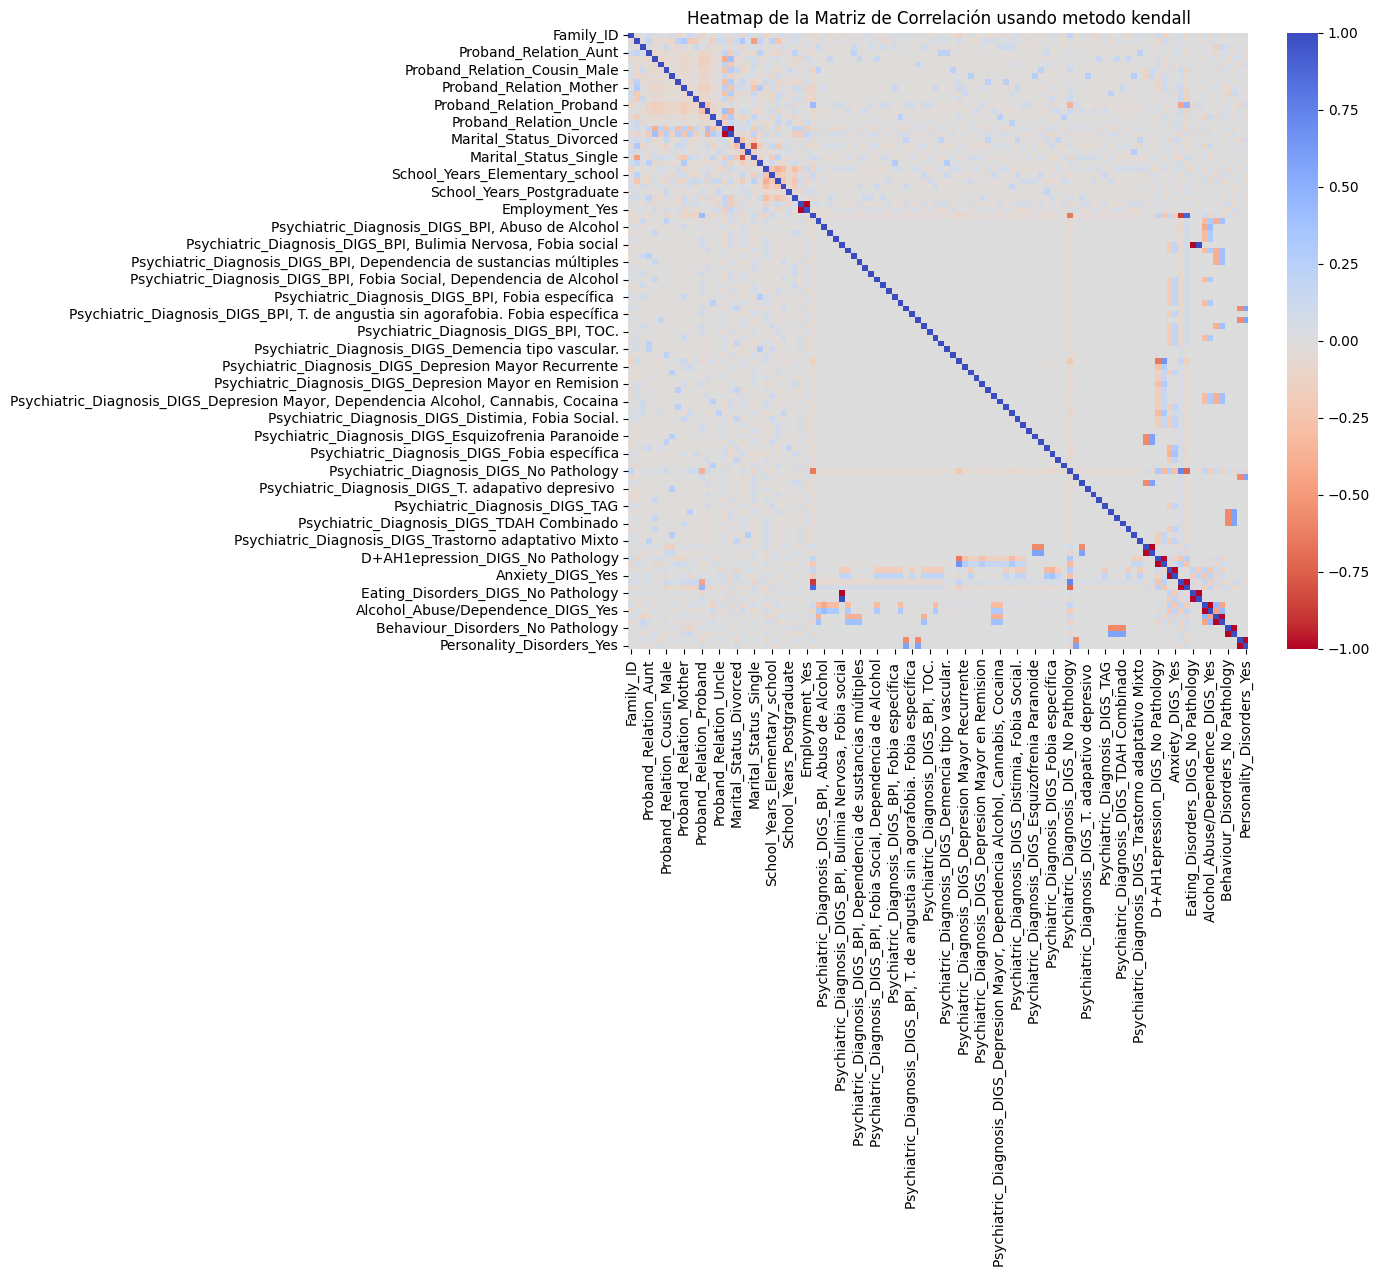

In [39]:
get_correlation_matrix(one_hot_df, "kendall")

Número de componentes para explicar el 90% de la varianza: 2


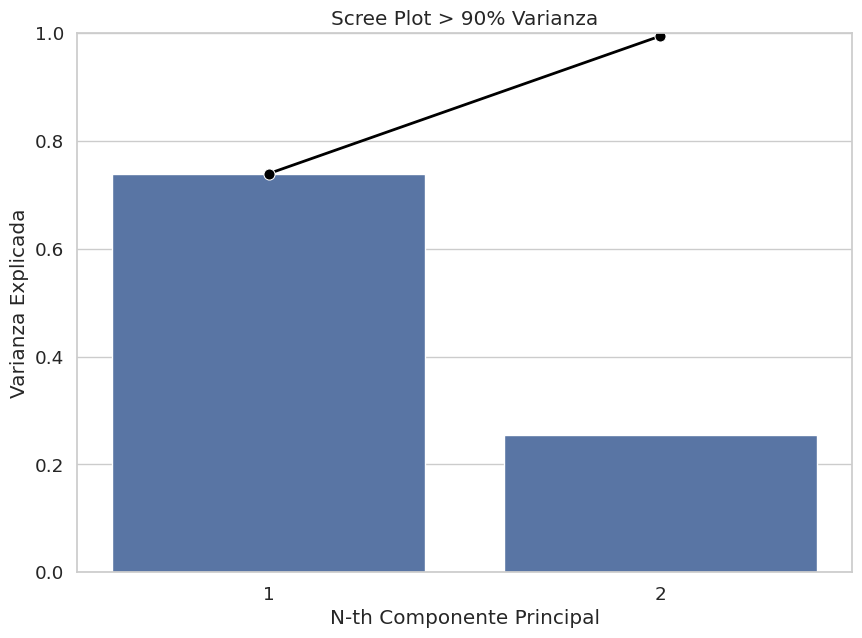

,PC1,PC2,PC3
Age,0.046508,0.998591,0.005546
Proband_Relation_Proband,0.002432,-0.001378,0.247931
School_Years_College,0.002314,-0.000835,-0.039543
Marital_Status_Married,0.001886,0.010786,-0.053151
Bipolar_DIGS_Yes,0.001617,-0.001810,0.499837
Psychiatric_Diagnosis_DIGS_BPI,0.001538,-0.002002,0.444202
D+AH1epression_DIGS_Yes,0.001403,0.002109,-0.040177
Psychiatric_Diagnosis_DIGS_Depresion Mayor,0.001250,0.001364,-0.025579
Proband_Relation_Father,0.000867,0.003778,-0.003151
Proband_Relation_Brother,0.000711,-0.001683,0.007620


In [94]:
components = get_PCA(one_hot_df)
components.head(20)

### Usando Label Encoder

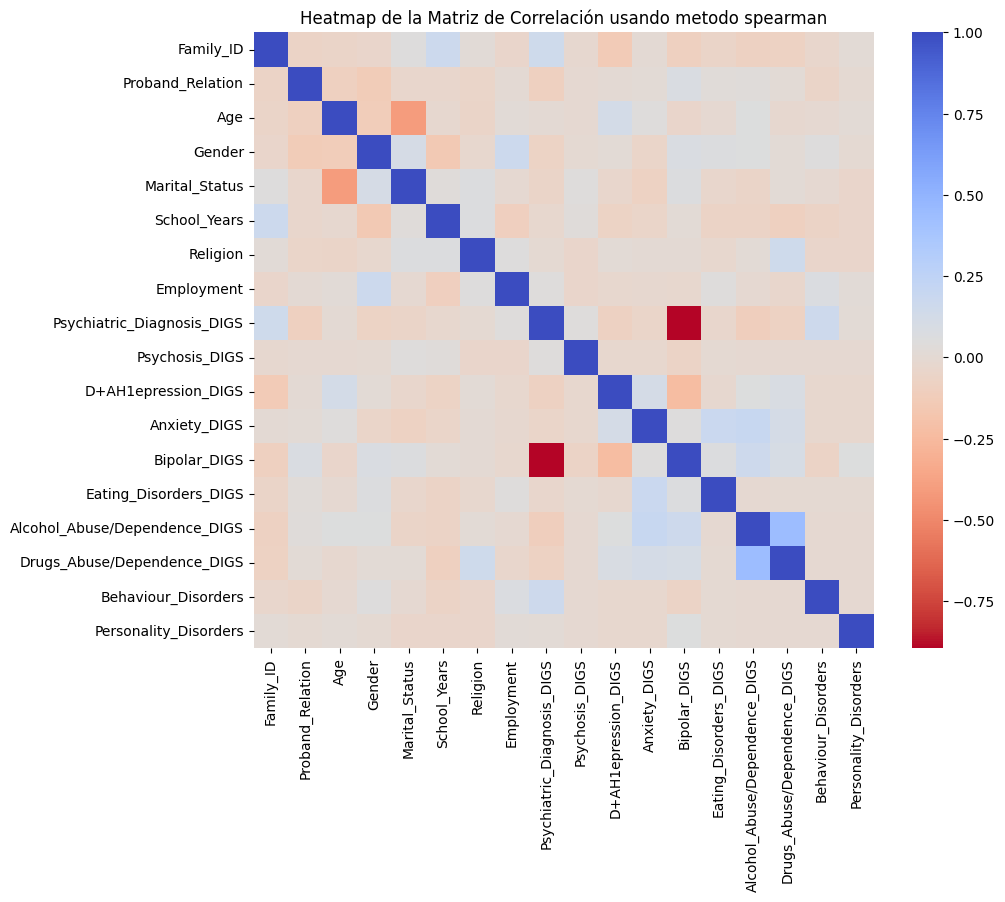

In [38]:
get_correlation_matrix(label_df, "spearman")

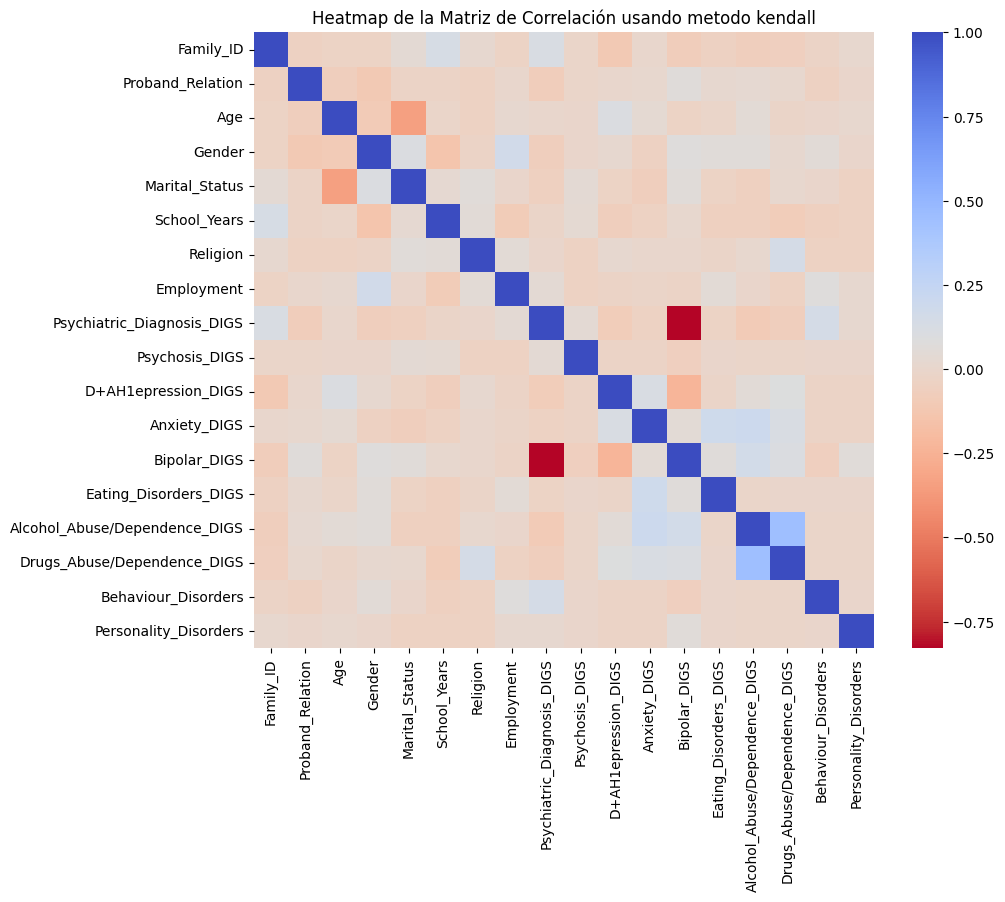

In [41]:
get_correlation_matrix(label_df, "kendall")

Número de componentes para explicar el 90% de la varianza: 3


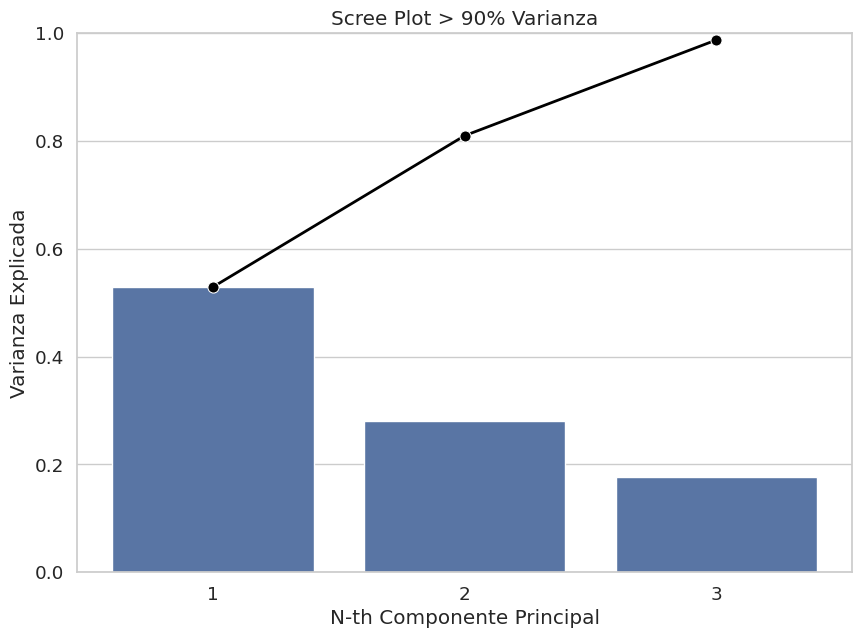

,PC1,PC2,PC3,PC4
Age,0.039261,-0.099990,0.993677,-0.019245
Proband_Relation,0.012511,0.020386,-0.018599,-0.998724
Bipolar_DIGS,0.004357,0.022563,0.001480,0.001436
D+AH1epression_DIGS,0.001291,-0.001021,0.002002,-0.002271
Gender,0.000833,0.001912,-0.003094,0.020240
Alcohol_Abuse/Dependence_DIGS,0.000612,0.000849,0.000612,-0.000175
Employment,0.000501,-0.001084,-0.000530,0.002528
Drugs_Abuse/Dependence_DIGS,0.000429,0.000408,-0.000139,0.001020
Eating_Disorders_DIGS,0.000109,0.000103,-0.000054,-0.000318
Behaviour_Disorders,0.000069,-0.000487,-0.000138,0.000908


In [95]:
components = get_PCA(label_df)
components.head(20)

# Preprocesamiento
Se ejecutan y justifican las estrategias para el manejo de valores faltantes, atípicos y alta cardinalidad (si aplica)

In [27]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421 entries, 0 to 426
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Family_ID                      421 non-null    int64 
 1   Proband_Relation               421 non-null    object
 2   Age                            421 non-null    int64 
 3   Gender                         421 non-null    object
 4   Marital_Status                 421 non-null    object
 5   School_Years                   421 non-null    object
 6   Religion                       421 non-null    object
 7   Employment                     421 non-null    object
 8   Psychiatric_Diagnosis_DIGS     421 non-null    object
 9   Psychosis_DIGS                 421 non-null    object
 10  D+AH1epression_DIGS            421 non-null    object
 11  Anxiety_DIGS                   421 non-null    object
 12  Bipolar_DIGS                   421 non-null    object
 13  Eating_Dis

In [28]:
# Eliminamos las columnas que no vamos a necesitar
columnas_a_eliminar = ["Religion", "Family_ID", "Psychiatric_Diagnosis_DIGS"]
df_copia.drop(columnas_a_eliminar, axis=1, inplace=True)

In [29]:
# Hacemos un head()
df_copia.head()

,Proband_Relation,Age,Gender,Marital_Status,School_Years,Employment,Psychosis_DIGS,D+AH1epression_DIGS,Anxiety_DIGS,Bipolar_DIGS,Eating_Disorders_DIGS,Alcohol_Abuse/Dependence_DIGS,Drugs_Abuse/Dependence_DIGS,Behaviour_Disorders,Personality_Disorders
0,Mother,72,Female,Married,Technical_studies,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
1,Father,77,Male,Married,College,Yes,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
2,Proband,36,Male,Single,Technical_studies,Yes,No Pathology,No Pathology,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
3,Mother,68,Female,Married,High_school,No,No Pathology,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology
4,Father,56,Male,Married,College,Yes,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology,No Pathology


# Conclusiones

Se incluyen las ideas/observaciones clave, asegurándose de responder todas las preguntas propuestas que apliquen al proyecto.